In [68]:
import pandas as pd
data = pd.read_csv("chicago_taxi_train.csv")

In [69]:
data.dtypes

Unnamed: 0                  int64
TRIP_START_TIMESTAMP       object
TRIP_END_TIMESTAMP         object
TRIP_START_HOUR           float64
TRIP_SECONDS                int64
TRIP_MILES                float64
TRIP_SPEED                float64
PICKUP_CENSUS_TRACT       float64
DROPOFF_CENSUS_TRACT      float64
PICKUP_COMMUNITY_AREA     float64
DROPOFF_COMMUNITY_AREA    float64
FARE                      float64
TIPS                      float64
TIP_RATE                  float64
TOLLS                     float64
EXTRAS                    float64
TRIP_TOTAL                float64
PAYMENT_TYPE               object
COMPANY                    object
dtype: object

In [70]:
data['TRIP_SPEED'].describe()

count    31694.000000
mean        20.256544
std         11.110390
min          4.000000
25%         11.000000
50%         17.600000
75%         27.500000
max         64.800000
Name: TRIP_SPEED, dtype: float64

### Preguntas
1. ¿Cuál es la tarifa máxima?
2. ¿Cuál es la distancia promedio entre todos los viajes?
3. ¿Cuántas compañias de taxis hay en el dataset?
4. ¿Cuál es el tipo de pago más frecuente?
5. ¿Hay algún valor anómalo?

In [71]:
data['FARE'].max()

159.25

In [72]:
distancia_promedio = data['TRIP_MILES'].mean()
print(f"la distancia promedio es: {distancia_promedio:.6f}")

la distancia promedio es: 8.289463


In [73]:
distinct_companies = data['COMPANY'].nunique()
print(f"Existen {distinct_companies} compañías")

Existen 31 compañías


In [74]:
data['PAYMENT_TYPE'].value_counts().idxmax()

'Credit Card'

In [75]:
Q1 = data['FARE'].quantile(0.25)
Q3 = data['FARE'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = data[(data['FARE']<lower) | (data['FARE']>upper)]

In [76]:
outliers['FARE'].describe()

count    118.000000
mean     101.294576
std       17.422596
min       83.500000
25%       87.750000
50%       94.750000
75%      109.875000
max      159.250000
Name: FARE, dtype: float64

<Axes: ylabel='FARE'>

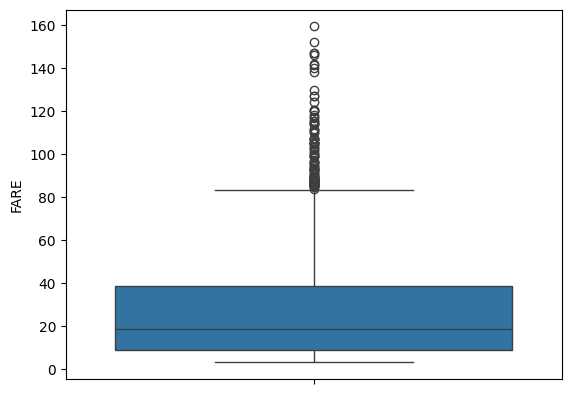

In [77]:
import seaborn as sns
sns.boxplot(data=data['FARE'])

In [78]:
data.columns

Index(['Unnamed: 0', 'TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP',
       'TRIP_START_HOUR', 'TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED',
       'PICKUP_CENSUS_TRACT', 'DROPOFF_CENSUS_TRACT', 'PICKUP_COMMUNITY_AREA',
       'DROPOFF_COMMUNITY_AREA', 'FARE', 'TIPS', 'TIP_RATE', 'TOLLS', 'EXTRAS',
       'TRIP_TOTAL', 'PAYMENT_TYPE', 'COMPANY'],
      dtype='object')

<Axes: >

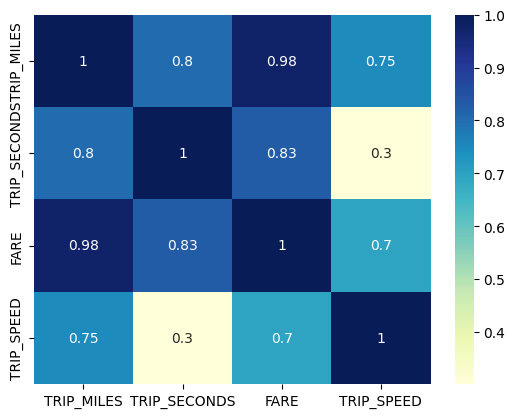

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

data2 = data[["TRIP_MILES", "TRIP_SECONDS", "FARE", "TRIP_SPEED"]]
corr = data2.corr(numeric_only=True)

fig, ax = plt.subplots()
sns.heatmap(corr, cmap='YlGnBu', annot=True)

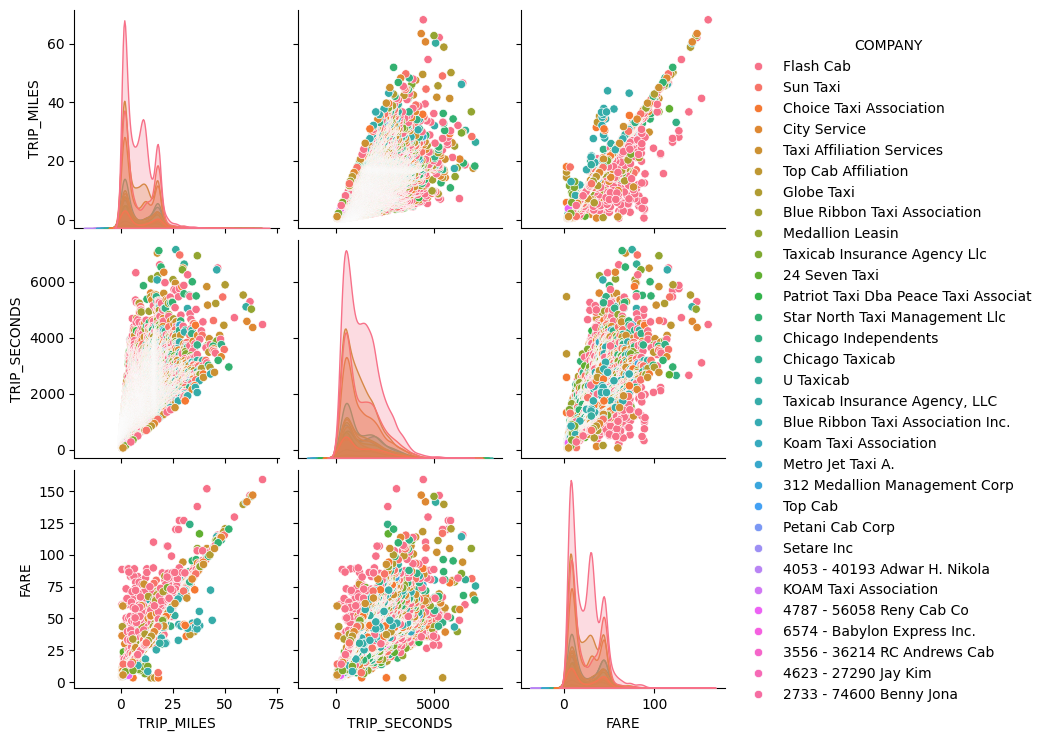

In [82]:
sns.pairplot(data, x_vars=["TRIP_MILES", "TRIP_SECONDS", "FARE"], y_vars=["TRIP_MILES", "TRIP_SECONDS", "FARE"], hue="COMPANY")

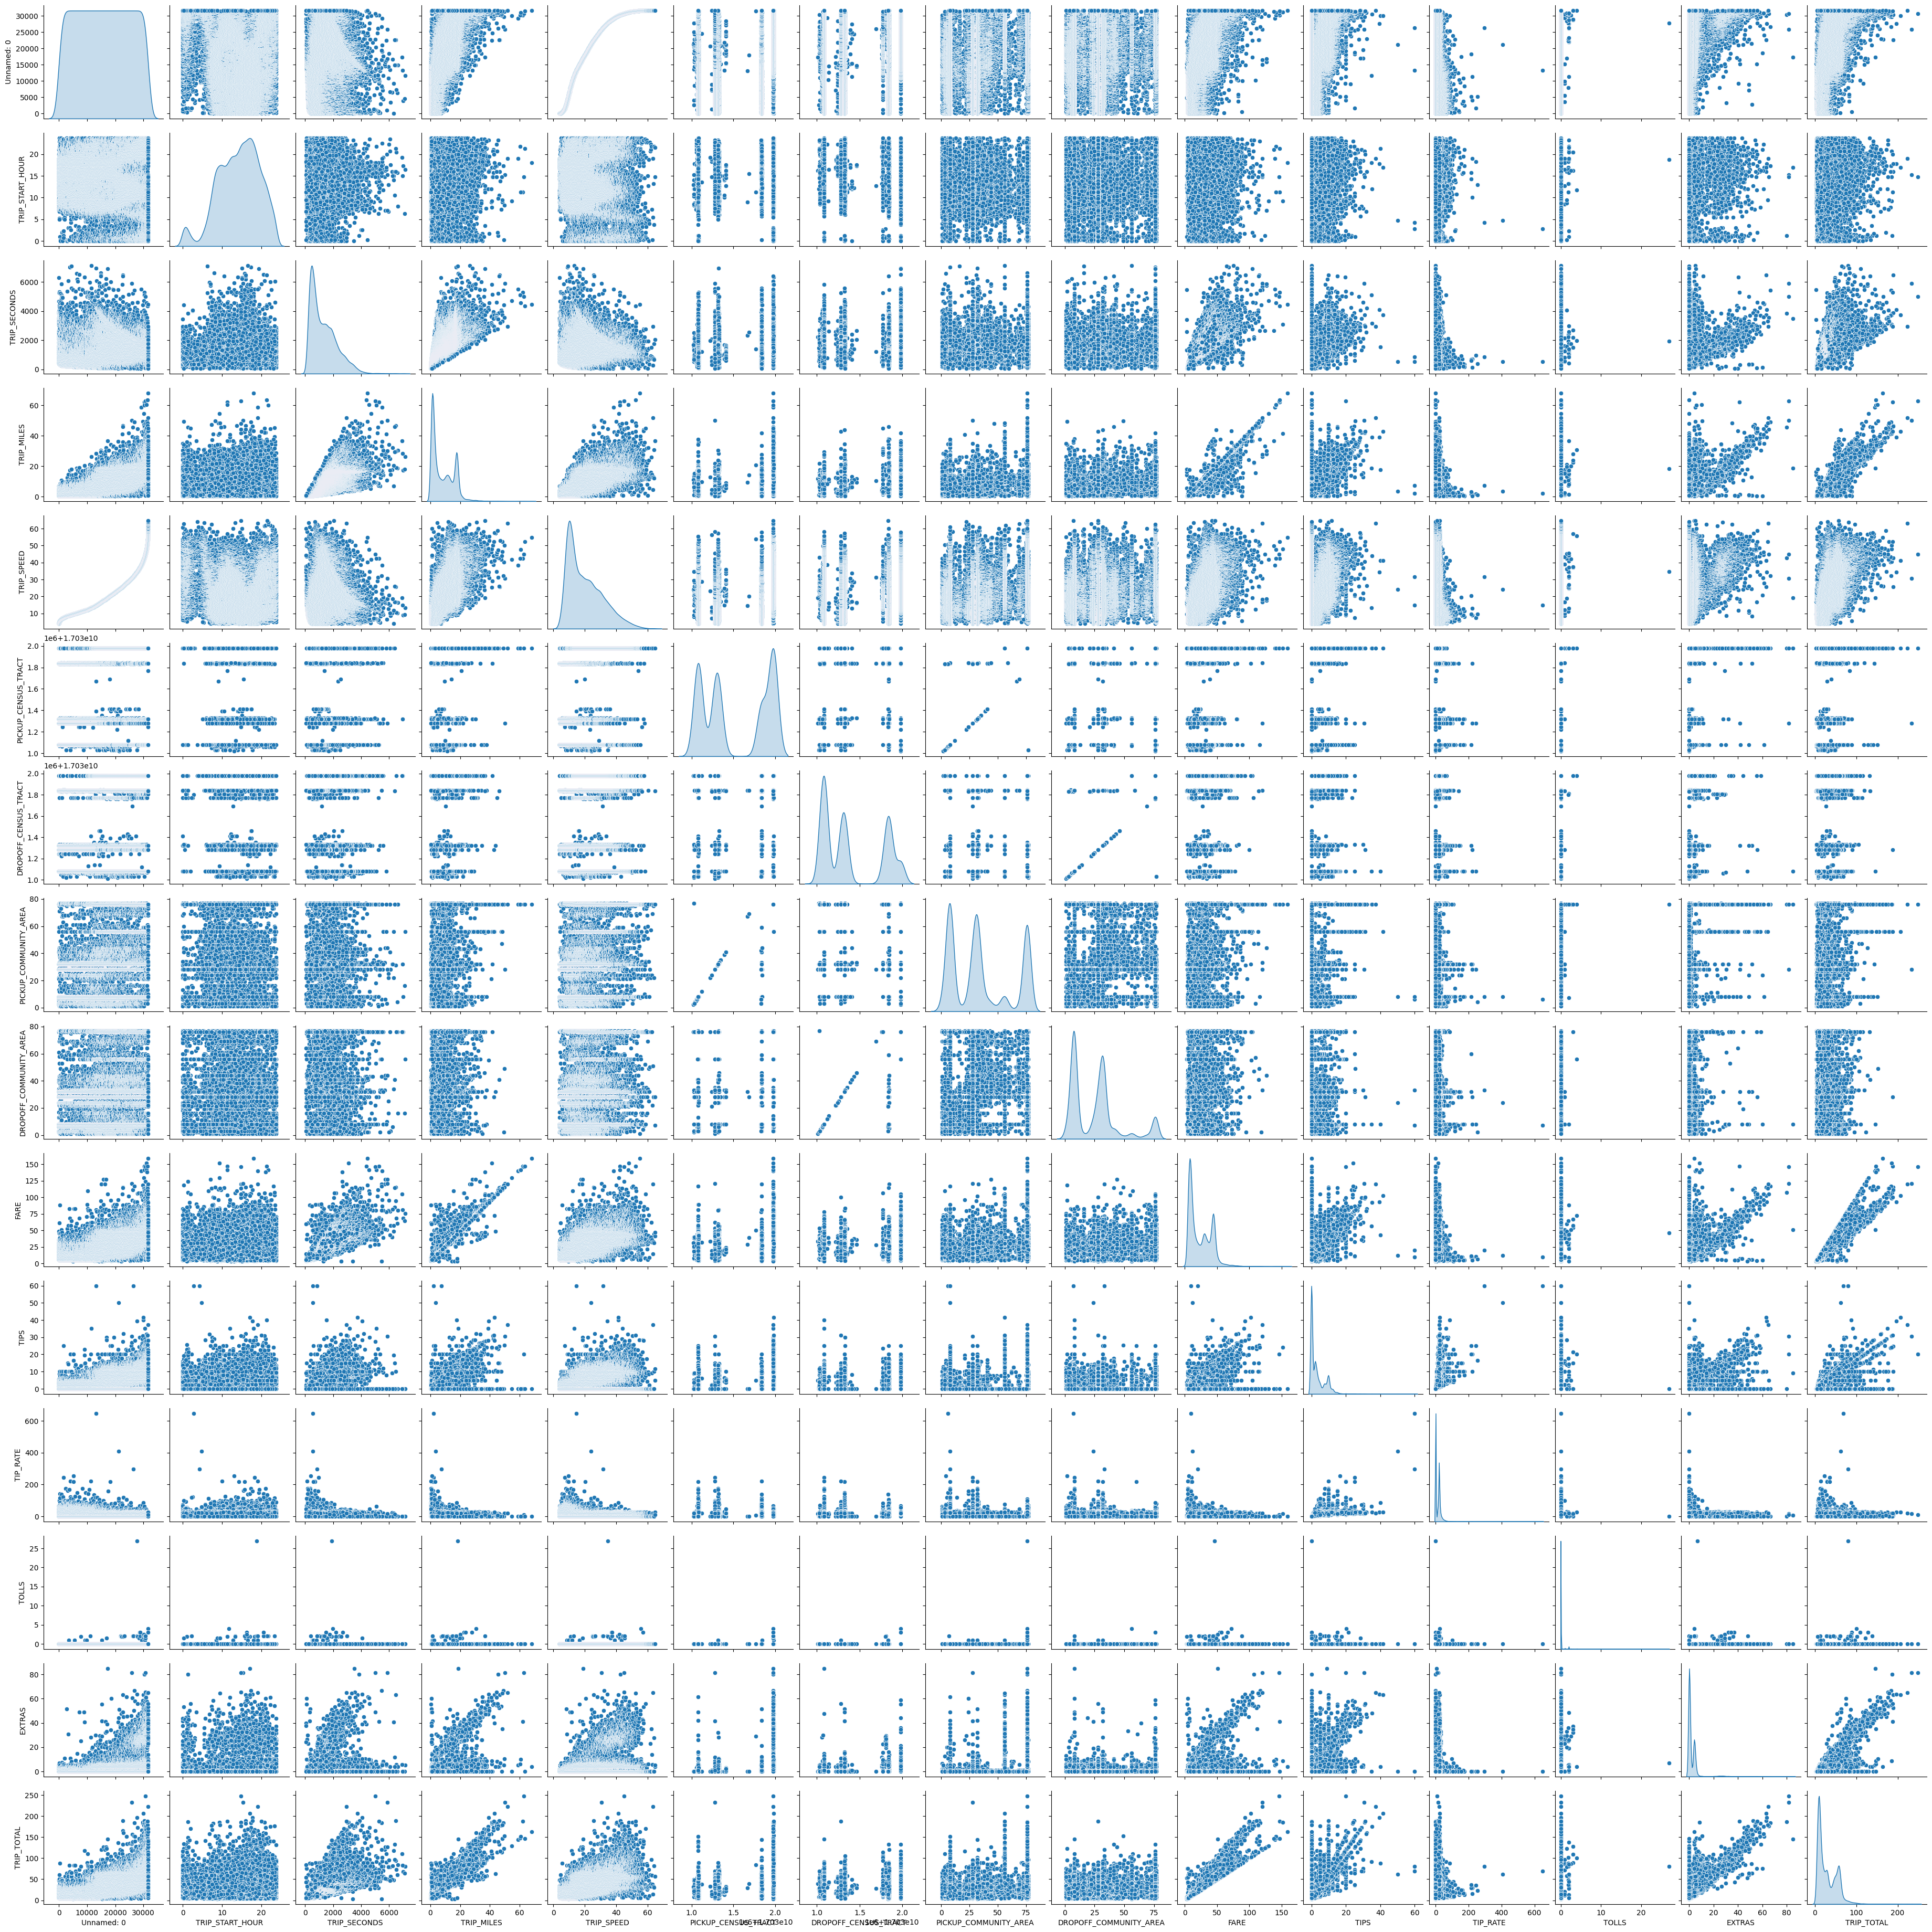

In [80]:
sns.pairplot(data, diag_kind='kde', )

In [83]:
data['COMPANY'].value_counts()

COMPANY
Flash Cab                               7887
Taxi Affiliation Services               4371
Sun Taxi                                4024
City Service                            3199
Chicago Independents                    1800
Medallion Leasin                        1390
Taxicab Insurance Agency, LLC           1365
Globe Taxi                              1309
Taxicab Insurance Agency Llc            1167
Star North Taxi Management Llc          1096
Blue Ribbon Taxi Association             919
Choice Taxi Association                  752
Top Cab Affiliation                      721
24 Seven Taxi                            708
U Taxicab                                424
Patriot Taxi Dba Peace Taxi Associat     131
Chicago Taxicab                          128
Koam Taxi Association                     43
312 Medallion Management Corp             40
Blue Ribbon Taxi Association Inc.         39
Petani Cab Corp                           39
KOAM Taxi Association                     28
Me

In [ ]:
!pip install scikit-learn

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ["TRIP_MILES"]
X = data[features]
Y = data['FARE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [86]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [87]:
y_pred = model.predict(X_test)

In [94]:
mean_squared_error(y_pred, Y_test)

15.755020408969674

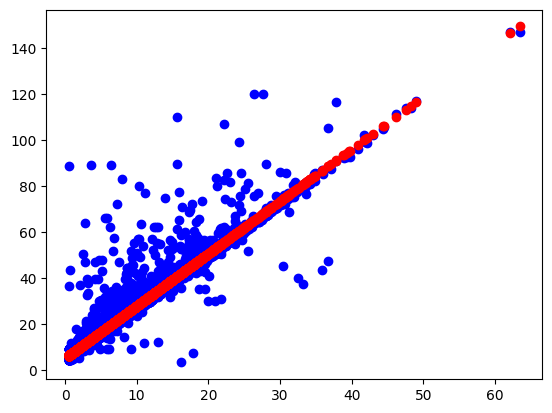

In [98]:
plt.scatter(X_test, Y_test, color='blue')
plt.scatter(X_test, y_pred, color='red')

In [101]:
data.columns

Index(['Unnamed: 0', 'TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP',
       'TRIP_START_HOUR', 'TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED',
       'PICKUP_CENSUS_TRACT', 'DROPOFF_CENSUS_TRACT', 'PICKUP_COMMUNITY_AREA',
       'DROPOFF_COMMUNITY_AREA', 'FARE', 'TIPS', 'TIP_RATE', 'TOLLS', 'EXTRAS',
       'TRIP_TOTAL', 'PAYMENT_TYPE', 'COMPANY'],
      dtype='object')

In [99]:
model.coef_

array([2.2757311])

In [100]:
model.intercept_

np.float64(5.017210503721934)

In [ ]:
Y = model.intercept_ + model.coef_*X